In [1]:
import pandas as pd
with pd.HDFStore("store.h5") as store:
    df = store['ddf']

AxesSubplot(0.125,0.125;0.775x0.755)


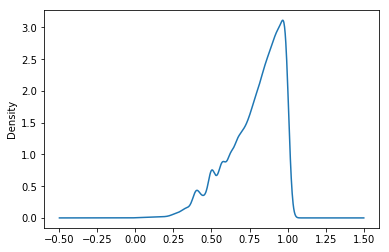

In [66]:
print(ddf.query('label == 1')['tnta'].plot.density())

In [37]:
ddf = df.query('label != -1 & isEdited != 1 & (t_nah + t_nta + t_yta + t_esh) > 0 & (m_nah + m_nta + m_yta + m_esh) > 0')

In [52]:
from pathlib import Path
from pytorch_transformers.tokenization_bert import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(Path("..\BERT\PREAITA"), do_lower_case=True)
import re
def x(match):
    ta = "the asshole"
    if(match.string.lower() == "aita"):
        return "Am I" + ta
    return "Would I be " + ta

def y(row):
    st = row['title'] + "\n" +  row['selftext']
    st = re.sub(r"\b(wib|ai)ta\b",x,st,flags=re.IGNORECASE)
    return(st)
    #return len(tokenizer.tokenize(st))-510 #remember we still need CLS and SEP
with pd.HDFStore("data.h5") as ds:
    ddf = ds['df']
    print(ddf.columns)
    print(ddf['kfold'])
    ddf['text'] = ddf[ddf.kfold.isin([4])].apply(y,axis=1)
    #ddf[['text','label']][ddf.kfold.isin([0,2,3])].to_csv('train.csv')
    #ddf[['text','label']][ddf.kfold.isin([1])].to_csv('val.csv')
    ddf[['text','label']].to_csv('test.csv')

#normal path
    #    ds['df'] = df.query('label != -1 & isEdited != 1 & (t_nah + t_nta + t_yta + t_esh) > 0 & (m_nah + m_nta + m_yta + m_esh) > 0')\
    #.apply(distill_row,axis=1,args=[6,])
    
    #temporary fix due to forgetting to create kfold column before download
    #ds['df'] = ds['df'].merge(df['kfold'],left_index=True,right_index=True)

# Percent samples, including titles > 512 tokens
# False    0.717
# True     0.283

Index(['created_utc', 'edited', 'gilded', 'isEdited', 'label', 'locked',
       'm_esh', 'm_info', 'm_nah', 'm_nta', 'm_yta', 'num_comments', 'over_18',
       'score', 'selftext', 'spoiler', 'sum', 't_esh', 't_info', 't_nah',
       't_nta', 't_yta', 'title', 'upvote_ratio', 'tnah', 'tnta', 'tyta',
       'tesh', 'stnah', 'stnta', 'styta', 'stesh', 'mnah', 'mnta', 'myta',
       'mesh', 'smnah', 'smnta', 'smyta', 'smesh', 'kfold'],
      dtype='object')
id
2hyfpw    2
44ra34    4
4ihec1    3
4pcrle    4
4pjl1e    1
4z2f7l    4
5047lt    1
5epuz2    4
5hid5b    0
5n6197    4
6azkqr    4
6fb703    3
6n2uh4    0
6uwy20    3
6yahn8    0
6z8nyu    2
736j4s    2
73j42j    1
785r0a    0
787p0b    2
7cxvmx    1
7fktpd    0
7gchd9    2
7hamag    1
7ho16v    3
7hyjzu    2
7j2wb8    0
7jgw1f    3
7kmvyq    2
7kogw4    1
         ..
caodtw    4
caodzo    3
caohkb    0
caohkc    0
caoiec    4
caojud    3
caombg    2
caomo1    4
caon1x    4
caookm    4
caoprf    2
caoq4h    1
caot4v    4
caoueo    

In [6]:
df.query('kfold == 0 | kfold == 2 | kfold == 3').sample(1000)

,created_utc,edited,gilded,isEdited,label,locked,m_esh,m_info,m_nah,m_nta,...,spoiler,sum,t_esh,t_info,t_nah,t_nta,t_yta,title,upvote_ratio,kfold
id,,,,,,,,,,,,,,,,,,,,,
9z8rf3,2018-11-21 23:53:25,NaT,0,0,2.0,0,0,0,0,5,...,0,4168,0,0,0,8,733,AITA for not giving a peadophile his pain relief?,0.82,2
apq0bb,2019-02-12 05:44:20,NaT,0,0,1.0,0,0,0,0,6,...,0,14,0,0,0,14,0,AITA If I don’t want to buy my mom a gps track...,1.00,3
b0k386,2019-03-13 09:45:40,NaT,0,0,1.0,0,2,6,3,8,...,0,22,3,6,3,10,0,AITA for blocking an ex friend without saying ...,0.88,2
45ngr2,2016-02-13 23:51:20,NaT,0,0,1.0,0,0,0,0,0,...,0,22,0,0,0,0,0,AITA for expecting my brother to help me brief...,0.60,0
bel6vc,2019-04-18 12:52:33,NaT,0,0,1.0,0,0,0,2,2,...,0,6,0,0,2,4,0,AITA for not playing guitar with my dad?,1.00,0
bl4w6x,2019-05-05 23:58:14,2019-05-06 17:24:57,0,0,1.0,0,0,91,9,241,...,0,449,0,91,9,342,0,AITA I have sued my sister to sell the propert...,0.97,0
aqmgek,2019-02-14 17:52:20,NaT,0,0,1.0,0,0,0,2,5,...,0,14,0,0,5,8,1,AITA for ghosting a guy I met on Tinder?,0.83,2
9ittqi,2018-09-25 16:48:23,NaT,0,0,1.0,0,0,0,0,0,...,0,13,0,0,0,0,0,AITA for not meeting every guy my best friend ...,0.83,3
b0cdwc,2019-03-12 20:06:46,NaT,0,0,0.0,0,0,2,3,1,...,0,14,0,2,4,1,1,AITA for missing out on family events to work ...,0.72,0


In [15]:
#n = prior weight
#strongly averages out probabilities and prevents any absolute 1s or 0s in the output
#comparing n = 0 vs n = 1 with 1k samples and ground
#
#0.135213	0.590840	0.209759	0.064187
#0.149700	0.535442	0.224965	0.089894
#0.136446	0.585142	0.212048	0.066364
def norm_row(row,n=1):
    fields = ['nah','nta','yta','esh']
    for md in ['t','m']:
        sm = sum(map(lambda x: row[md + '_' + x] + n,fields))
        if sm > 0:
            for i, x in enumerate(fields):
                row[md + x] = (row[md + '_' + x] + n) / sm
    return row

#https://arxiv.org/pdf/1503.02531v1.pdf
#softmax distillation function - seems more biased at low temps
#temp = 1 vs temp = 10
#0.120741	0.582321	0.210538	0.047486
#0.185990	0.403319	0.271170	0.120300
import numpy as np
def distill_row(row,temp,n=1):
    fields = ['nah','nta','yta','esh']
    for md in ['t','m']:
        sm = sum(map(lambda x: row[md + '_' + x] + n,fields))
        if sm > 0:
            for x in fields:
                row[md + x] = (row[md + '_' + x] + n) / sm
                                     
        sm = sum(map(lambda x: np.exp((row[md + '_' + x] + n)/temp),fields))
        if sm > 0:
            for x in fields:
                row['s'+ md + x] = np.exp((row[md + '_' + x] + n)/temp) / sm
    return row

#softmax, even at higher temps tends to emphasize extremes

In [ ]:
#0.135213	0.590840	0.209759	0.064187
for f in ['nah','nta','yta','esh']:
    print(ddf.sample(1000).apply(distill_row,axis=1,args=[6,1])[['t'+f,'m'+f,'st'+f,'sm'+f]].describe())

In [ ]:
distill_row(ddf.loc['c77lbt'],80)

In [ ]:
ddf.sample(100).apply(distill_row,axis=1,args=[10,])[['tnah','tnta','tyta','tesh']].round(6)

In [ ]:
ddf['length'] = ddf['selftext'].apply(len)

In [ ]:
for l in ['locked','over_18','spoiler']:
    ddf[l] = ddf[l].apply(lambda x: 1 if x else 0)
#ddf['edited'] = ddf['edited'].apply(lambda x: 1 if x == x else 0)

In [ ]:
sel = ddf.sample(1000).apply(norm_row,axis=1)[['edited','locked','over_18','length','upvote_ratio','num_comments','tnta','mnta','tyta','myta','tesh','mesh','tnah','mnah']]
sel.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
#x = ddf.sample(10000)
x = pd.concat([ddf[ddf['label'] == i].sample(min(ddf.label.value_counts())) for i in range(4)])
target = x['label']
data = x[['selftext','title']]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.5, random_state=0)

Lesson: None of the variable other than upvote_ratio seem particularly correlated with judgement. Length also seems correlated. Not sure how helpful these soft target variables are either. Edits also seem to generally suggest YTA. Will try again with better correlation indicator

Max-based indicators tend to be slightly more influenced by metadata characteristics (upvote ratio, comments, etc)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
   #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax


import numpy as np

def cat2bin(rows):
    return np.array([[int(row > 1), int(row % 2)] for row in rows])

test_bin = pd.DataFrame(cat2bin(ytest),ytest.index,columns=['OP','TO'])
print(pd.crosstab(test_bin['OP'],test_bin['TO']))
results['RNG'] = np.random.random_integers(0,3,len(ytest))
results = {}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer()
tfv.fit(list(xtrain.selftext) + list(xtrain.title) + list(xtest.selftext) + list(xtest.title))

xtrain_tfv = tfv.transform(xtrain.title) + tfv.transform(xtrain.selftext)
xtest_tfv = tfv.transform(xtest.title) + tfv.transform(xtest.selftext)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nnb = MultinomialNB()
nnb.fit(xtrain_tfv,ytrain)
results["TF-IDF - MultinomialNB"] = nnb.predict(xtest_tfv)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBClassifier

#soft classifier
xgbc = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=10)
xgbc.fit(xtrain_titles, ytrain)
results["USE - XGBClassifier"] = xgbc.predict(xtest_titles)

In [ ]:
import sklearn.metrics
#print(predictions)
#print(ytest.tolist())
for cls,pred in results.items():
    pred_bin = pd.DataFrame(cat2bin(pred),ytest.index,columns=['OP','TO'])
    x = pd.Series(pred).value_counts()
    print("-------------- " + cls + ": " + str(x[0]) + ' '+ str(x[1]) + ' '+ str(x[2]) + ' '+ str(x[3]) + ' ---------------')
    print(sklearn.metrics.classification_report(ytest.tolist(),pred,labels=[0,1,2,3]))
    plot_confusion_matrix(ytest.tolist(), pred, classes=['NAH','NTA','YTA','ESH'], normalize=True,
                      title= cls + ': Classes')
    print(sklearn.metrics.classification_report(test_bin,pred_bin))
    #print(plot_confusion_matrix(ytest.tolist(), predictions, classes=['NAH','NTA','YTA','ESH'], normalize=True,
    #                  title='Normalized confusion matrix'))

In [ ]:
results["USE - XGBClassifier"] = hclf.predict(xtest_titles)